<a href="https://colab.research.google.com/github/grizzay-dev/Burst_Analysis/blob/master/colab/tf_df_burst_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow
!pip install tensorflow_decision_forests
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.8 MB 5.2 MB/s 
     |████████████████████████████████| 511.7 MB 6.8 kB/s 
     |████████████████████████████████| 1.6 MB 53.3 MB/s 
     |████████████████████████████████| 5.8 MB 64.1 MB/s 
     |████████████████████████████████| 438 kB 39.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninsta

In [4]:
import tensorflow_decision_forests as tfdf
import numpy as np
import pandas
import time
import io

from google.colab import files
uploaded = files.upload()



Saving ttree_output3.csv to ttree_output3.csv


In [5]:
#train_df = pandas.read_csv("ttree_output3.csv")
train_df = pandas.read_csv(io.BytesIO(uploaded['ttree_output3.csv']))


def split(ds, r=0.3):
    test_ind = np.random.rand(len(ds)) < r
    return ds[~test_ind], ds[test_ind]

#split data
np.random.seed(12)
burst_train, burst_test = split(train_df)

In [6]:
print(burst_train)
print(burst_test)

      K_D_gmax  KV3_1_gmax  KV2_FAST_gmax  KV2_SLOW_gmax  KV1_4_gmax  \
1     0.028434    3.829150       0.004813              0    0.004336   
3     0.021348    0.065983       0.001249              0    0.075277   
5     0.146348    4.977160       0.006630              0    0.001650   
6     0.017371    1.138440       0.000000              0    0.387265   
8     0.027796    3.012450       0.187698              0    0.000000   
...        ...         ...            ...            ...         ...   
3487  0.682409    6.632650       0.000000              0    0.002548   
3488  0.136533    0.730607       0.001371              0    0.000000   
3490  0.862652    0.181719       0.105662              0    0.000000   
3493  0.894487    0.941545       0.166792              0    0.163997   
3495  0.274480    0.039228       0.004127              0    0.015498   

      KV4_2_gmax  K_M_gmax   SK_gmax  NA_T_AX_gmax  NA_T_SD_gmax  NA_P_gmax  \
1       0.001250  0.040091  0.001833       45.7249      

In [7]:
#Convert the pandas dataframe into a TensorFlow dataset
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(burst_train, label="burst_type")

# Train the model
model = tfdf.keras.RandomForestModel()
model.fit(train_ds)

Use /tmp/tmp576encwf as temporary training directory


/usr/local/lib/python3.7/dist-packages/tensorflow_decision_forests/keras/core.py:2542: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_dataframe = dataframe.drop(label, 1)


Reading training dataset...
Training dataset read in 0:00:05.340956. Found 2439 examples.
Training model...
Model trained in 0:00:03.239576
Compiling model...
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [8]:
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(burst_test, label="burst_type")

model.compile(metrics=["accuracy"])
print(model.evaluate(test_ds))

model.save("models/burst_model")

/usr/local/lib/python3.7/dist-packages/tensorflow_decision_forests/keras/core.py:2542: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_dataframe = dataframe.drop(label, 1)


2/2 [==============================] - 1s 13ms/step - loss: 0.0000e+00 - accuracy: 0.8486
[0.0, 0.8486281633377075]


INFO:tensorflow:Assets written to: models/burst_model/assets


INFO:tensorflow:Assets written to: models/burst_model/assets


In [9]:
#Print model summary
model.summary()

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (15):
	CA_HVA_gmax
	CA_LVA_gmax
	IH_gmax
	KV1_4_gmax
	KV2_FAST_gmax
	KV2_SLOW_gmax
	KV3_1_gmax
	KV4_2_gmax
	K_D_gmax
	K_M_gmax
	LEAK_gmax
	NA_P_gmax
	NA_T_AX_gmax
	NA_T_SD_gmax
	SK_gmax

No weights

Variable Importance: MEAN_MIN_DEPTH:
    1. "KV2_SLOW_gmax"  9.805396 ################
    2.     "LEAK_gmax"  9.805396 ################
    3.       "__LABEL"  9.805396 ################
    4.    "KV1_4_gmax"  9.237261 ##############
    5.       "SK_gmax"  9.195124 ##############
    6.       "IH_gmax"  8.340007 #############
    7.  "NA_T_SD_gmax"  8.338889 #############
    8.      "K_D_gmax"  8.312947 ############
    9.  "NA_T_A

In [21]:
#Plot tree
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=1, max_depth=3)
#tfdf.model_plotter.plot_model_in_colab(model)

In [20]:
tree = model.make_inspector().extract_tree(0)
tfdf.model_plotter.plot_tree(tree)
print(tree.pretty())

with open('readme.txt', 'w') as f:
    f.write(tree.pretty())

(KV3_1_gmax >= 0.542170524597168; miss=True, score=0.035761039704084396)
    ├─(pos)─ (CA_LVA_gmax >= 0.44791150093078613; miss=False, score=0.04992780461907387)
    │        ├─(pos)─ (NA_P_gmax >= 0.32345449924468994; miss=True, score=0.05185578390955925)
    │        │        ├─(pos)─ (KV3_1_gmax >= 1.6780999898910522; miss=True, score=0.07039374858140945)
    │        │        │    ...
    │        │        └─(neg)─ ProbabilityValue([0.0, 1.0],n=81.0) (idx=169)
    │        └─(neg)─ (KV4_2_gmax >= 0.07674115151166916; miss=False, score=0.03883713111281395)
    │                 ├─(pos)─ (NA_P_gmax >= 0.16832800209522247; miss=True, score=0.1596965491771698)
    │                 │    ...
    │                 └─(neg)─ (KV2_FAST_gmax >= 0.20150350034236908; miss=False, score=0.027604008093476295)
    │                      ...
    └─(neg)─ (KV4_2_gmax >= 0.09432929754257202; miss=False, score=0.020101124420762062)
             ├─(pos)─ (NA_T_AX_gmax >= 43.898597717285156; miss=False,

In [12]:
#var importance
model.make_inspector().variable_importances()

{'MEAN_MIN_DEPTH': [("KV2_SLOW_gmax" (1; #5), 9.805396290262347),
  ("LEAK_gmax" (1; #10), 9.805396290262347),
  ("__LABEL" (4; #15), 9.805396290262347),
  ("KV1_4_gmax" (1; #3), 9.237260923269169),
  ("SK_gmax" (1; #14), 9.195124344157117),
  ("IH_gmax" (1; #2), 8.340006588705101),
  ("NA_T_SD_gmax" (1; #13), 8.33888893168532),
  ("K_D_gmax" (1; #8), 8.312946793837868),
  ("NA_T_AX_gmax" (1; #12), 7.615761558989187),
  ("K_M_gmax" (1; #9), 7.1061315321379865),
  ("KV2_FAST_gmax" (1; #4), 4.776306488647217),
  ("KV3_1_gmax" (1; #6), 4.665173340790307),
  ("CA_HVA_gmax" (1; #0), 4.475157868436807),
  ("KV4_2_gmax" (1; #7), 4.449499935407834),
  ("NA_P_gmax" (1; #11), 3.4534821190626506),
  ("CA_LVA_gmax" (1; #1), 1.9113188946556934)],
 'NUM_AS_ROOT': [("CA_LVA_gmax" (1; #1), 118.0),
  ("KV3_1_gmax" (1; #6), 52.0),
  ("KV4_2_gmax" (1; #7), 40.0),
  ("KV2_FAST_gmax" (1; #4), 34.0),
  ("NA_P_gmax" (1; #11), 28.0),
  ("CA_HVA_gmax" (1; #0), 20.0),
  ("K_M_gmax" (1; #9), 3.0),
  ("NA_T_AX_gm

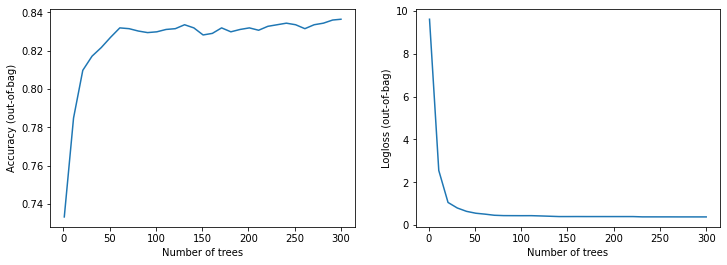

In [13]:
#plot training
import matplotlib.pyplot as plt

logs = model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()